## Peningkatan Gambar Satelit

## 1. Import Libraries

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2. Download dan Load Sample Image

In [53]:
img = cv2.imread("Screenshot 2025-04-15 185021.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 3. Tampilkan Gambar Asli dan Histogram

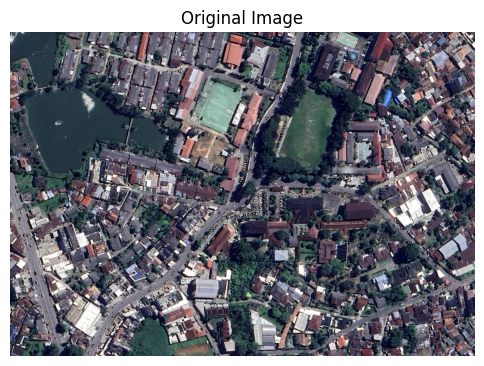

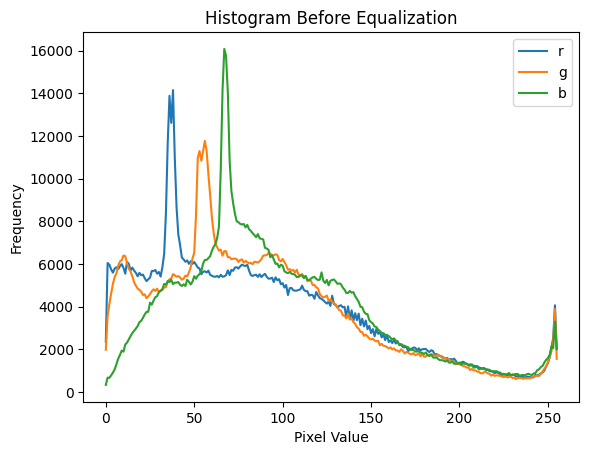

In [54]:
# Gambar asli
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

# Histogram sebelum equalization
plt.figure()
for i, col in enumerate(['r','g','b']):
    hist = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.plot(hist, label=col)
plt.title("Histogram Before Equalization")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## 4. Terapkan Histogram Equalization

## 4.1 Grayscale Equalization

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized_gray = cv2.equalizeHist(gray)

## 4.2 Color Equalization via YUV

In [56]:
# Konversi ke YUV
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
# Equalisasi channel Y (luminance)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
# Kembali ke RGB
equalized_color = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

## 5. Tampilkan Gambar Hasil dan Histogram

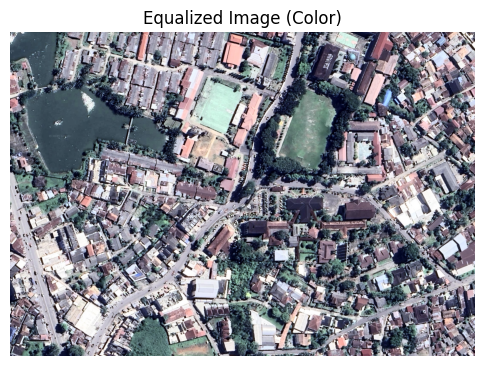

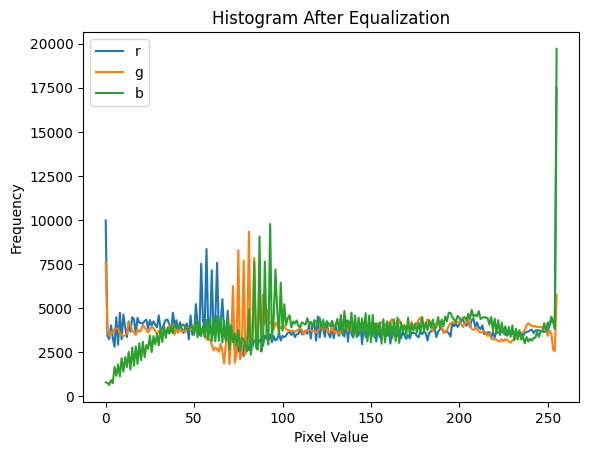

In [57]:
# Gambar setelah equalization
plt.figure(figsize=(6,6))
plt.imshow(equalized_color)
plt.title("Equalized Image (Color)")
plt.axis("off")

# Histogram setelah equalization
plt.figure()
for i, col in enumerate(['r','g','b']):
    hist = cv2.calcHist([equalized_color],[i],None,[256],[0,256])
    plt.plot(hist, label=col)
plt.title("Histogram After Equalization")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## 6. Perbandingan Sebelum & Sesudah

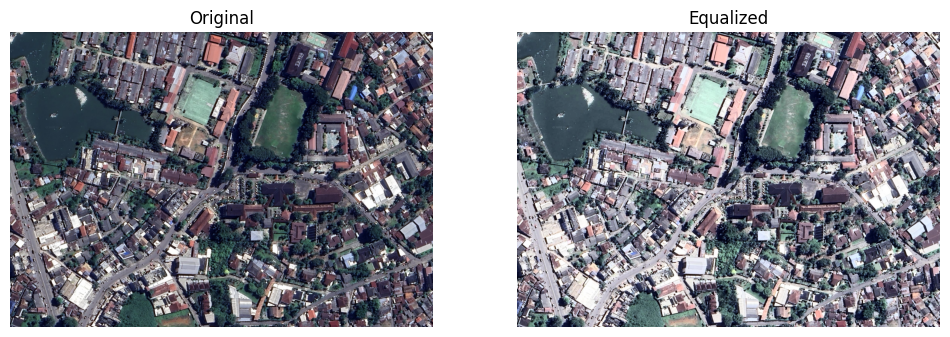

In [58]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].imshow(img_rgb)
axes[0].set_title("Original")
axes[0].axis("off")
axes[1].imshow(equalized_color)
axes[1].set_title("Equalized")
axes[1].axis("off")
plt.show()

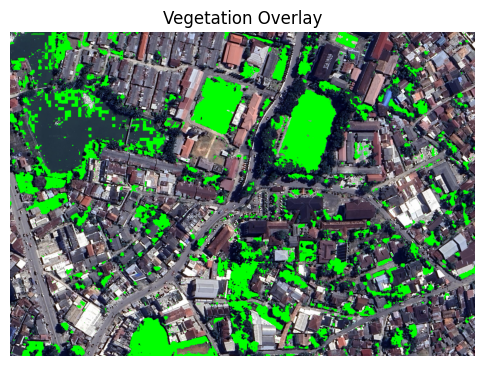

In [ ]:
overlay = img_rgb.copy()
overlay[veg_mask==255] = [0,255,0]  # hijau terang
plt.figure(figsize=(6,6))
plt.imshow(overlay)
plt.title('Vegetation Overlay')
plt.axis('off')
plt.show()

## Hasil

Dengan equalization pada channel luminance (Y), kontras area gelap dan terang meningkat sehingga pola vegetasi dan batas lahan lebih jelas terlihat. Histogram pasca‐equalization menunjukkan distribusi piksel yang lebih merata di seluruh rentang [0,255], menandakan peningkatan kontras. Batas-batas antara penggunaan lahan yang berbeda (jalan, bangunan, lapangan terbuka) menjadi lebih jelas dan lebih dapat dibedakan

Perlu diwaspadai: equalization global dapat memperkuat noise pada citra.